In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from configparser import ConfigParser

from skimage import io
from matplotlib import pyplot as plt

import plot
import pipeline as pipe
import utils

## Load the config file

In [27]:
config = utils.parse_config('./config.ini')
parameter = config.parameter
parameter

{'gauß_depth': 6, 'hist_orientations': 8, 'phog_depth': 3}

## Load image

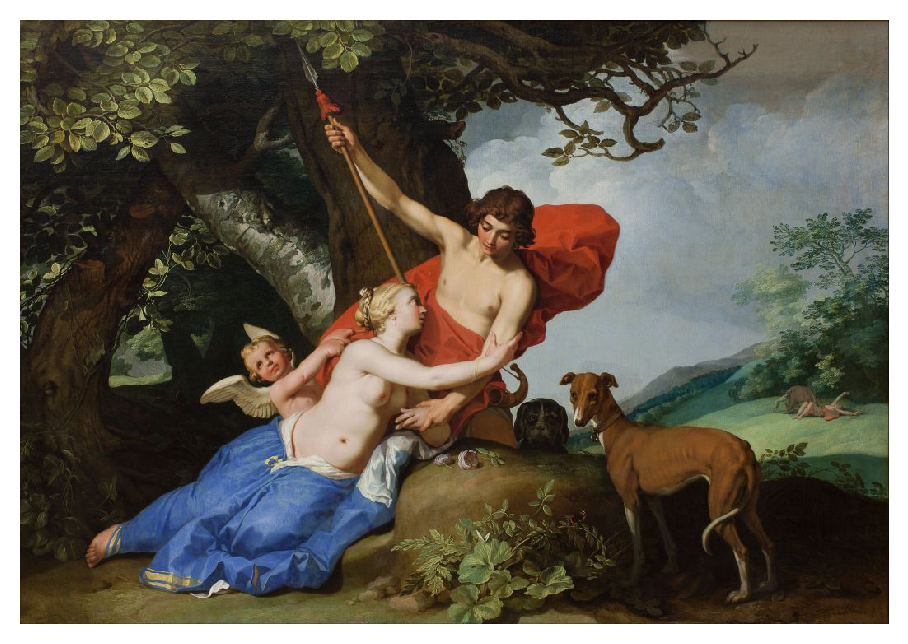

In [28]:
#image_path = "../testpics/Giovanni_Moses_test.jpg"
filename = "Abraham_Bloemaert_-_Venus_and_Adonis_-_Google_Art_Project.jpg"
img = io.imread(config.input_folder + "/" + filename)

plot.img(img)

## Resize Image

In [5]:
print(f"Actual size: {img.shape}")
print(f"Actual area: {img.shape[0] * img.shape[1]}")

Actual size: (734, 1055, 3)
Actual area: 774370


In [6]:
norm_width = 500
img = utils.resize_image(img, norm_width**2)

In [7]:
utils.resize_image??

Signature: utils.resize_image(img, area)
Source:   
def resize_image(img, area):
    '''Resize an image to a specific area'''
    width, height = img.shape[:2]
    new_width = round(sqrt(area / (height/width)))
    new_height = round(sqrt(area / (width/height)))
    return resize(img, (new_width, new_height))
File:      c:\users\christa\documents\bachelorarbeit\bachelor\utils.py
Type:      function


In [8]:
from math import sqrt
a, b = 734, 1055
area = a*b
area

774370

In [9]:
new_area = 500*500
x = round(sqrt(new_area / (b/a)))
y = round(sqrt(new_area / (a/b)))
print(x, y, x*y)

417 599 249783


In [10]:
print(a/x, b/y)

1.7601918465227817 1.7612687813021703


In [11]:
print(f"Actual size: {img.shape}")
print(f"Actual area: {img.shape[0] * img.shape[1]}")

Actual size: (417, 599, 3)
Actual area: 249783


## Convert to Lab

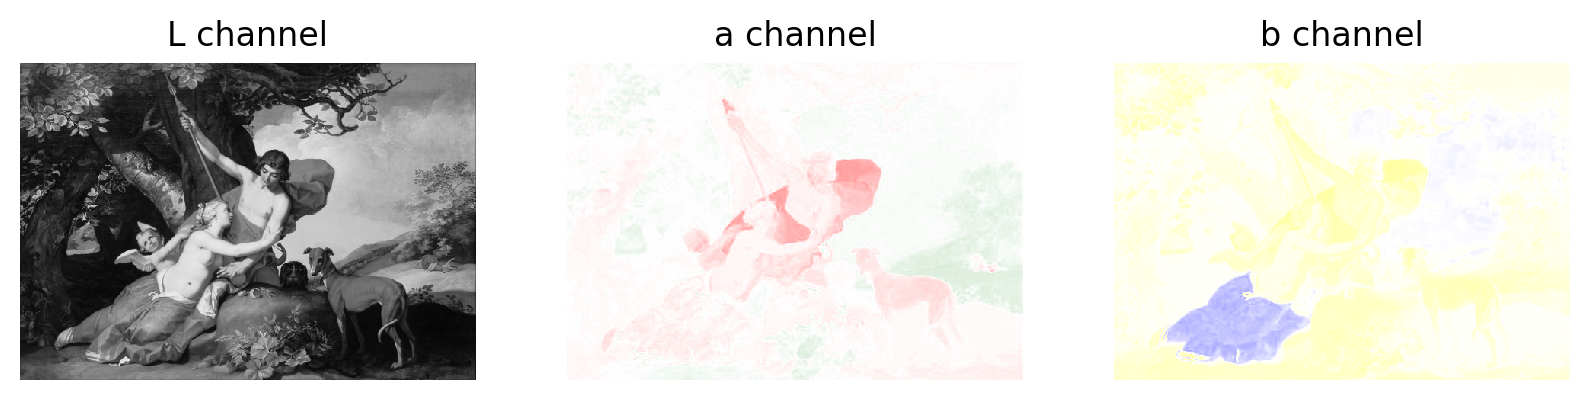

In [26]:
lab = pipe.convert2lab(img)
plot.lab(lab)

## Create Scalespace

### Calculate sigmas

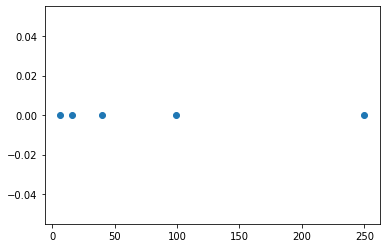

In [13]:
sigmas = utils.calculate_sigmas(max_sigma=norm_width/2, number=parameter['gauß_depth'])
zeros = [0 for _ in sigmas]
plt.plot(sigmas, zeros, marker='o', linestyle='')

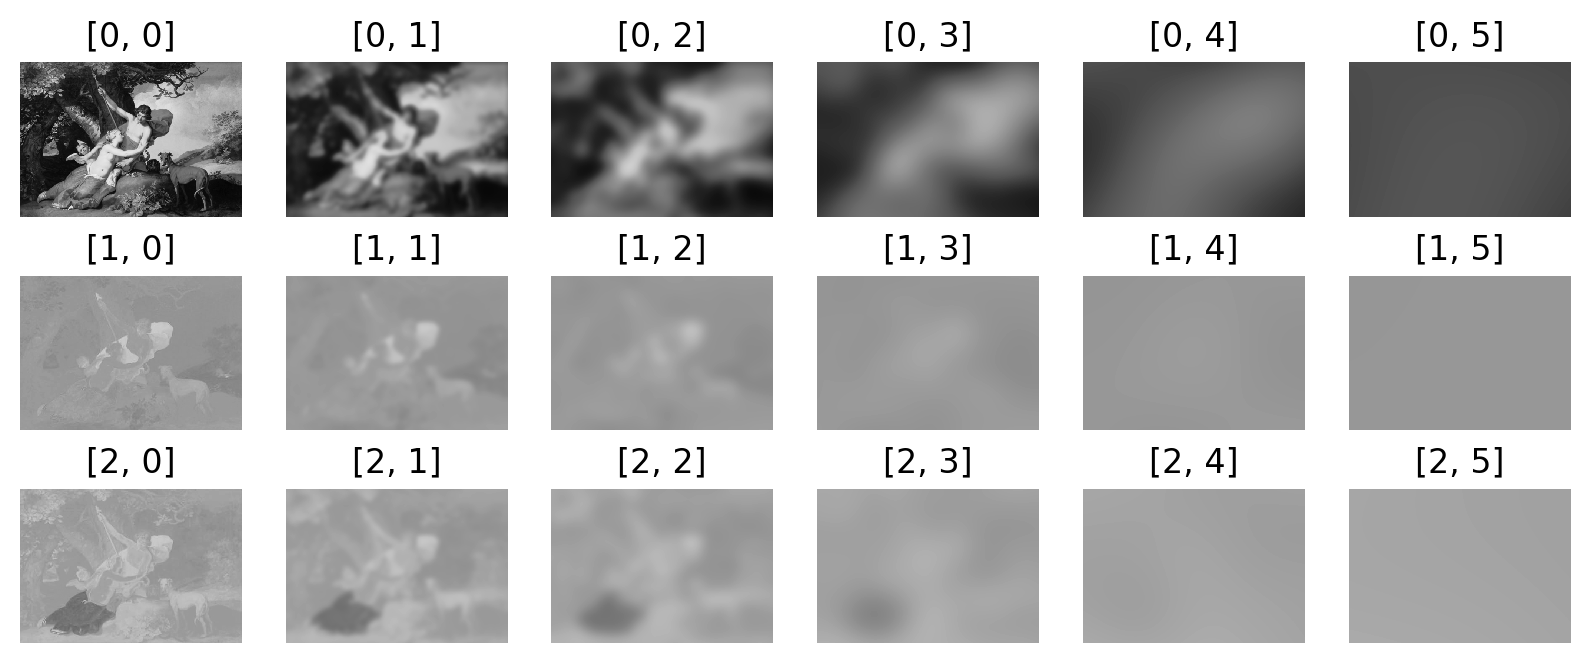

In [14]:
scalespaces = pipe.create_scalespaces(lab, sigmas)
plot.scalespaces(scalespaces)

## Create differences

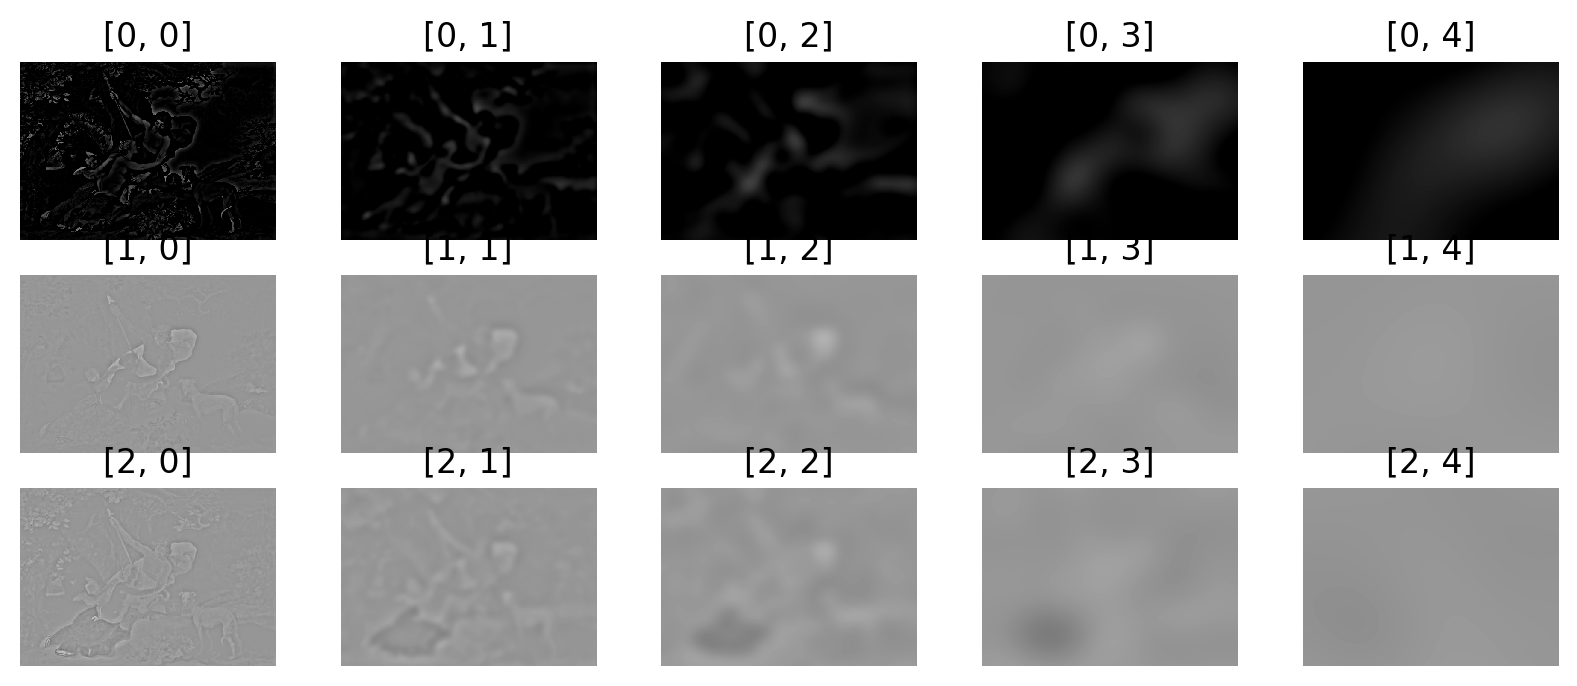

In [15]:
diffs = pipe.create_differences(scalespaces)
plot.scalespaces(diffs)

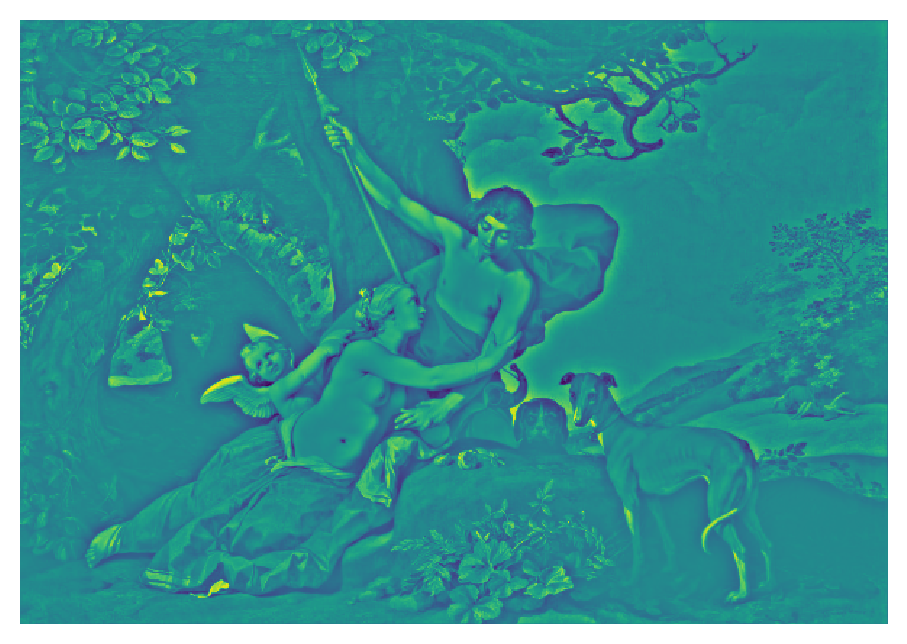

In [22]:
plot.img(diffs[0][0])

## Create vector

In [17]:
pipe.create_feature_vector_mp?

Signature: pipe.create_feature_vector_mp(differences, depth, orientations)
Docstring: Create the full feature vector over all differences images
File:      c:\users\christa\documents\bachelorarbeit\bachelor\pipeline.py
Type:      function


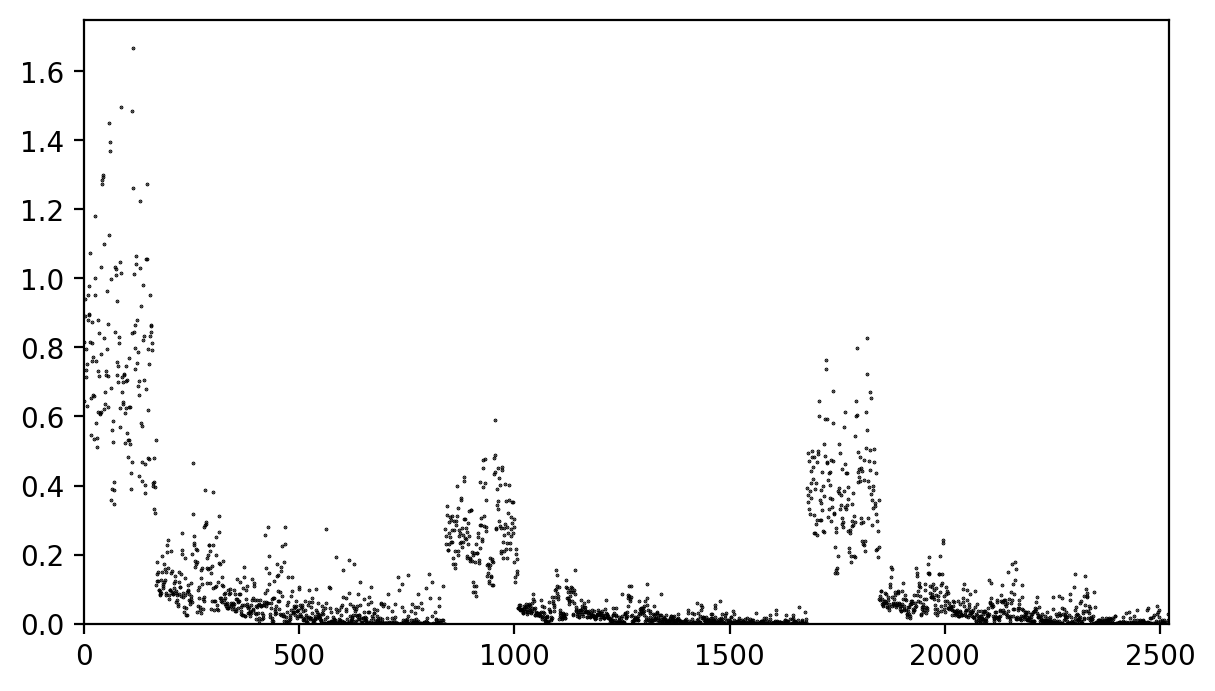

In [18]:
vector = pipe.create_feature_vector_mp(diffs, 
                                       depth=parameter['phog_depth'], 
                                       orientations=parameter['hist_orientations'])
plot.testplot(vector)

In [19]:
plot.vector(vector, parameter=parameter, color='black')

TypeError: vector() got an unexpected keyword argument 'color'

In [ ]:
*parameter

In [ ]:
plot.vector?